In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rooms/room-dataset/gaming/gaming_1104.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_634.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_835.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_865.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_1184.png
/kaggle/input/house-rooms/room-dataset/gaming/gaming_904.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_986.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_985.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_426.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_185.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_225.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_960.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_589.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_1082.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_326.jpg
/kaggle/input/house-rooms/room-dataset/gaming/gaming_96.jpg
/kaggle/input/house-ro

### Dataset source: https://www.kaggle.com/datasets/mikhailma/house-rooms-streets-image-dataset

In [4]:
import glob as gb

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [5]:
import warnings

warnings.filterwarnings("ignore", message="All log messages before absl::InitializeLog() is called are written to STDERR")
warnings.filterwarnings("ignore", message="Fallback to op-by-op mode because memset node breaks graph update")

In [6]:
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Path gambar
img_path = "/kaggle/input/house-rooms-streets-image-dataset/kaggle_room_street_data/house_data"

input_dir = 'images'
output_dir = 'output'

# Membuat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

In [8]:
# Membuat Folder Kategori
categories = ['bath', 'bed', 'din', 'kitchen', 'living']
for category in categories:
    category_dir = os.path.join(output_dir, category)
    os.makedirs(category_dir, exist_ok=True)

In [9]:
# Mencari Path Gambar
all_images = gb.glob(img_path + "/*.jpg")

In [10]:
# Memindahkan Gambar ke Folder Kategori yang Sesuai
for img_path in all_images:
    for category in categories:
        if category in img_path:
            shutil.copy(img_path, os.path.join(output_dir, category, os.path.basename(img_path)))
            break # Pindah ke gambar berikutnya setelah menemukan kategori

In [11]:
# Buat folder train dan test
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data menjadi 70%train 30%test
for category in categories:
    category_dir = os.path.join(output_dir, category)
    images = os.listdir(category_dir)
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    
    # Pindahkan gambar-gambar ke dalam folder train dan test
    for img in train_images:
        target_dir = os.path.join(train_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

    for img in test_images:
        target_dir = os.path.join(test_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

In [12]:
# Cetak jumlah gambar dalam folder train
print("\nJumlah Gambar dalam Folder Train:")
for category in categories:
    train_category_dir = os.path.join(train_dir, category)
    num_train_images = len(os.listdir(train_category_dir))
    print(f"{category}: {num_train_images} gambar")

# Cetak jumlah gambar dalam folder test
print("\nJumlah Gambar dalam Folder Test:")
for category in categories:
    test_category_dir = os.path.join(test_dir, category)
    num_test_images = len(os.listdir(test_category_dir))
    print(f"{category}: {num_test_images} gambar")


Jumlah Gambar dalam Folder Train:
bath: 423 gambar
bed: 873 gambar
din: 810 gambar
kitchen: 675 gambar
living: 891 gambar

Jumlah Gambar dalam Folder Test:
bath: 182 gambar
bed: 375 gambar
din: 348 gambar
kitchen: 290 gambar
living: 382 gambar


Train Folder

Contoh Gambar untuk Kategori living:


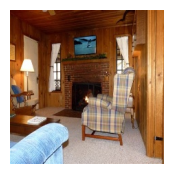


Contoh Gambar untuk Kategori bath:


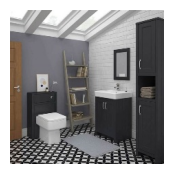


Contoh Gambar untuk Kategori kitchen:


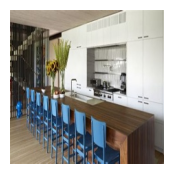


Contoh Gambar untuk Kategori bed:


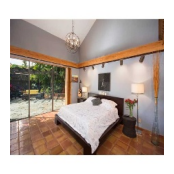


Contoh Gambar untuk Kategori din:


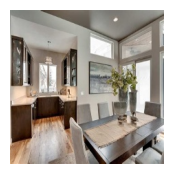


Test Folder

Contoh Gambar untuk Kategori living:


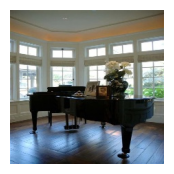


Contoh Gambar untuk Kategori bath:


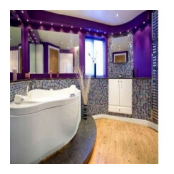


Contoh Gambar untuk Kategori kitchen:


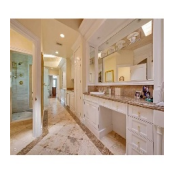


Contoh Gambar untuk Kategori bed:


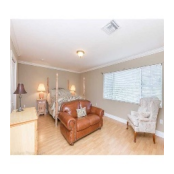


Contoh Gambar untuk Kategori din:


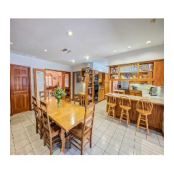

In [13]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_random_images(folder, num_images=1, figsize=(4, 4)):
    categories = os.listdir(folder)
    for category in categories:
        category_dir = os.path.join(folder, category)
        images = os.listdir(category_dir)
        random_images = random.sample(images, num_images)
        print(f"\nContoh Gambar untuk Kategori {category}:")
        for img_file in random_images:
            img_path = os.path.join(category_dir, img_file)
            img = mpimg.imread(img_path)
            plt.figure(figsize=figsize)
            plt.imshow(img)
            plt.axis("off")
            plt.show()

print('Train Folder')
visualize_random_images(train_dir, figsize=(2, 2))
print('\nTest Folder')
visualize_random_images(test_dir, figsize=(2, 2)) 

In [14]:
from keras.applications.vgg16 import preprocess_input


np.random.seed(42)
trdata = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)

traindata = trdata.flow_from_directory(
    directory="./output/train", 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

tsdata = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    samplewise_center=True
)

testdata = tsdata.flow_from_directory(
    directory="./output/test", 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

Found 3672 images belonging to 5 classes.
Found 1577 images belonging to 5 classes.


In [15]:
testdata.class_indices

{'bath': 0, 'bed': 1, 'din': 2, 'kitchen': 3, 'living': 4}

### MODELING

In [16]:
# VGG16 model (VGG16 is a famous convolution neural net (CNN) architecture 
# invented by Karen Simonyan and Andrew Zisserman in 2014.)

from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# freeze semua layer kecuali 2,3,4 layer dari akhir
for layer in base_model.layers:
    layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [18]:
# base_model.trainable = False

In [19]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow as tf

device_name = tf.test.gpu_device_name()

np.random.seed(42)

model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 13,503,493 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#freeze all except last
#lr 0.01  -> [1.5810940265655518, 0.242232084274292]
#lr 0.005 -> [1.5810940265655518, 0.242232084274292]
#lr 0.0001 -> [1.0104479789733887, 0.6474318504333496]

###
# default [0.4518248736858368, 0.8433734774589539]
#lr 0.05 -> [1.5774046182632446, 0.242232084274292]
#lr 0.001 -> [0.706860363483429, 0.72542804479599]
#lr 0.005 -> [0.4232180714607239, 0.864933431148529] [0.3939892649650574, 0.8693722486495972]
#lr 0.0001 -> [0.6639527678489685, 0.7463538646697998]

### lr 0.005 dropout 0.1 [0.4487777352333069, 0.833861768245697]
### lr 0.005 dropout 0.3 [0.48815634846687317, 0.8205453157424927]

device_name = tf.test.gpu_device_name()

modelpath = './output/bestmodel.keras'

np.random.seed(42)

### train the model
with tf.device(device_name):
    
    optimizer = SGD(learning_rate=0.005)
    
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'])

    # Callback EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Callback ModelCheckpoint untuk menyimpan bobot terbaik
    checkpoint = ModelCheckpoint(
        modelpath,
        monitor='val_accuracy',
        save_best_only=True,  # Hanya menyimpan bobot terbaik
        mode='max',  # Mode untuk membandingkan nilai metrik (misalnya 'max' untuk akurasi)
        verbose=1  # Menampilkan pesan saat menyimpan
    )

    # Train the model
    history = model.fit(x=traindata, validation_data=testdata, epochs=100, batch_size=32, callbacks=[early_stopping,checkpoint])

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1714277097.822375     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714277097.841197     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 74/115 ━━━━━━━━━━━━━━━━━━━━ 33s 808ms/step - accuracy: 0.1747 - loss: 2.3520

W0000 00:00:1714277156.882536     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.1954 - loss: 2.1427

W0000 00:00:1714277172.289238     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.35701, saving model to ./output/bestmodel.keras


W0000 00:00:1714277189.917066     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


115/115 ━━━━━━━━━━━━━━━━━━━━ 133s 810ms/step - accuracy: 0.1958 - loss: 2.1392 - val_accuracy: 0.3570 - val_loss: 1.5438
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.2386 - loss: 1.5783
Epoch 2: val_accuracy improved from 0.35701 to 0.44071, saving model to ./output/bestmodel.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 55s 448ms/step - accuracy: 0.2391 - loss: 1.5780 - val_accuracy: 0.4407 - val_loss: 1.3248
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.4681 - loss: 1.3566
Epoch 3: val_accuracy improved from 0.44071 to 0.57387, saving model to ./output/bestmodel.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 444ms/step - accuracy: 0.4679 - loss: 1.3565 - val_accuracy: 0.5739 - val_loss: 1.0898
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.5828 - loss: 1.1258
Epoch 4: val_accuracy improved from 0.57387 to 0.61192, saving model to ./output/bestmodel.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 444ms/step - accuracy: 0.5826 - loss: 1.1259 - v

In [21]:
#Test the model with the test set

model.evaluate(testdata)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8946 - loss: 0.3427


[0.42245009541511536, 0.8655675053596497]

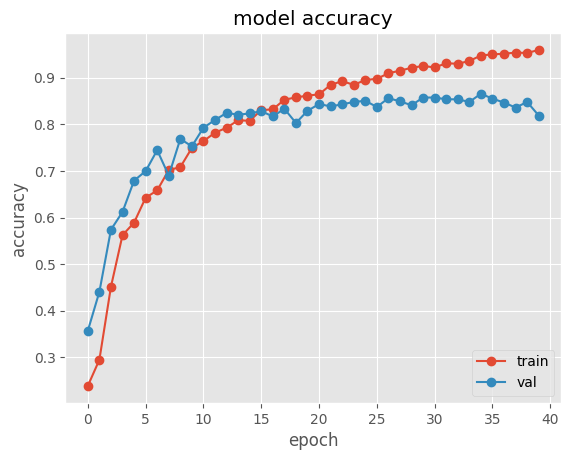

In [22]:
# Visualize the model

plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

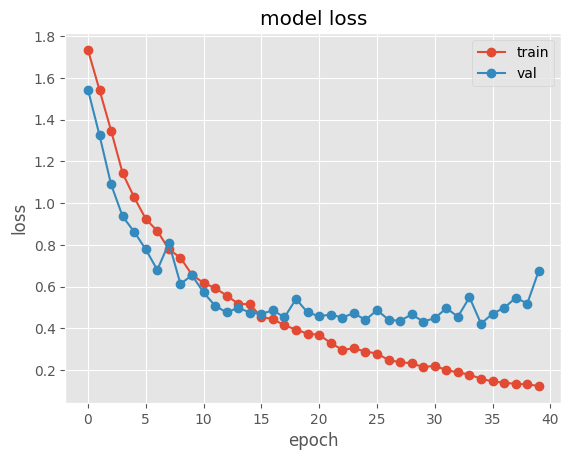

In [23]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label kelas menggunakan model terhadap data uji
predictions = model.predict(testdata)
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label sebenarnya dari data uji
true_classes = testdata.labels

# Dapatkan nama kelas
class_labels = list(testdata.class_indices.keys())

# Buat classification matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification matrix
print("Classification Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

 2/50 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step 

W0000 00:00:1714279305.932641     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step
Classification Matrix:
[[169   3   0   8   2]
 [  4 338   3   4  26]
 [  3   2 293  19  31]
 [ 11   1  29 242   7]
 [  3  25  21  10 323]]

Classification Report:
              precision    recall  f1-score   support

        bath       0.89      0.93      0.91       182
         bed       0.92      0.90      0.91       375
         din       0.85      0.84      0.84       348
     kitchen       0.86      0.83      0.84       290
      living       0.83      0.85      0.84       382

    accuracy                           0.87      1577
   macro avg       0.87      0.87      0.87      1577
weighted avg       0.87      0.87      0.87      1577



W0000 00:00:1714279312.887740     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy adalah rasio dari jumlah prediksi yang benar (true predictions) dibagi dengan jumlah total instance dalam dataset. 

Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false positive (FP). 

 Recall mengukur seberapa baik model dalam menemukan semua instance yang benar dari kelas yang diinginkan. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false negative (FN). 

F1-score adalah rata-rata harmonik dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall.

### Mencoba dengan dataset lain

### Dataset source: https://www.kaggle.com/datasets/annielu21/house-rooms

In [98]:
import os
import shutil

# Menggunakan direktori yang dapat ditulis
img_path2 = '/kaggle/input/house-rooms/room-dataset'
input_dir = 'images'
output_dir2 = 'new_output'

# Membuat folder output jika belum ada
os.makedirs(output_dir2, exist_ok=True)

# Membuat Folder Kategori
categories = ['bath', 'bed', 'din', 'kitchen', 'living']
for category in categories:
    category_dir = os.path.join(output_dir2, category)
    os.makedirs(category_dir, exist_ok=True)

In [99]:
folder_mapping = {
    'bathroom': 'bath',
    'bedroom': 'bed',
    'dining': 'din',
    'kitchen': 'kitchen',
    'living': 'living'
}

In [100]:
# Memindahkan file ke folder yang dipilih
for root, dirs, files in os.walk(img_path2):
    for file in files:
        category = os.path.basename(root)
        if category in folder_mapping:
            source_file = os.path.join(root, file)
            destination_dir = os.path.join(output_dir2, folder_mapping[category])
            shutil.copy(source_file, destination_dir)

In [101]:
for category in categories:
    category_dir = os.path.join(output_dir2, category)
    num_files = len(os.listdir(category_dir))
    print(f"Total {category} files: {num_files}")

Total bath files: 740
Total bed files: 1083
Total din files: 1178
Total kitchen files: 1208
Total living files: 1164


In [104]:
# Define the ImageDataGenerator for the new dataset
new_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

# Create a generator for the new dataset
new_generator = new_datagen.flow_from_directory(
    directory=output_dir2,
    classes=['bath', 'bed', 'din', 'kitchen', 'living'],
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    batch_size=32,  # Specify the batch size
    shuffle=False  # Do not shuffle the data for testing
)

Found 5366 images belonging to 5 classes.


In [105]:
def create_model():

    np.random.seed(42)

    model = Sequential()
    model.add(Input(shape=(224,224,3)))
    model.add(base_model)
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(len(categories), activation='softmax'))
    
    
    optimizer = SGD(learning_rate=0.005)
    
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
    return model

In [106]:
model2 = create_model()

In [107]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 13,503,493 (51.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [108]:
model2.load_weights('/kaggle/working/output/bestmodel.keras')

In [110]:
model2.evaluate(new_generator)

 19/168 ━━━━━━━━━━━━━━━━━━━━ 1:50 744ms/step - accuracy: 0.7440 - loss: 0.9314

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


168/168 ━━━━━━━━━━━━━━━━━━━━ 145s 862ms/step - accuracy: 0.7530 - loss: 0.8600


W0000 00:00:1714283055.613574     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.6558175683021545, 0.8039507865905762]

### Didapatkan akurasi 80% untuk dataset yang lain